<a href="https://colab.research.google.com/github/Yashas-naidu/Adobe_Gensolve_Round_2/blob/main/adobe_gensolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
def read_csv ( csv_path ):
  np_path_XYs = np . genfromtxt ( csv_path , delimiter = ',')
  path_XYs = []
  for i in np . unique ( np_path_XYs [: , 0]):
    npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
    XYs = []
    for j in np . unique ( npXYs [: , 0]):
      XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
      XYs . append ( XY )
    path_XYs . append ( XYs )
  return path_XYs

In [31]:
import matplotlib.pyplot as plt
def plot(path_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    my_colours = ['red', 'blue', 'green']  # Define your colors here
    for i, XYs in enumerate(path_XYs):
        c = my_colours[i % len(my_colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
    # Add any other necessary plot customization
    plt.show()



In [13]:
%pip install svgwrite  cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00


In [24]:
import svgwrite
import cairosvg

def polylines2svg ( paths_XYs , svg_path ):
  W , H = 0 , 0
  colours = ['red', 'blue', 'green']
  for path_XYs in paths_XYs :
    for XY in path_XYs :
      W , H = max (W , np .max ( XY [: , 0])) , max (H , np .max ( XY [: , 1]))
  padding = 0.1
  W , H = int ( W + padding * W ) , int ( H + padding * H )
  # Create a new SVG drawing
  dwg = svgwrite . Drawing ( svg_path , profile = 'tiny' ,shape_rendering = 'crispEdges')
  group = dwg . g ()
  for i , path in enumerate ( paths_XYs ):
    path_data = []
    c = colours [ i % len( colours )]
    for XY in path :
      path_data . append (( " M " , ( XY [0 , 0] , XY [0 , 1])))
      for j in range (1 , len( XY )):
        path_data . append (( " L " , ( XY [j , 0] , XY [j , 1])))
      if not np . allclose ( XY [0] , XY [ -1]):
        path_data . append (( " Z " , None ))
    group . add ( dwg . path ( d = path_data , fill =c ,stroke =  'none' , stroke_width =2))

  dwg . add ( group )
  dwg . save ()
  png_path = svg_path . replace ( '. svg' , '. png ')
  fact = max (1 , 1024 // min (H , W ))
  cairosvg . svg2png ( url = svg_path , write_to = png_path ,parent_width =W , parent_height =H ,output_width = fact *W , output_height = fact *H ,background_color = 'white')
  return

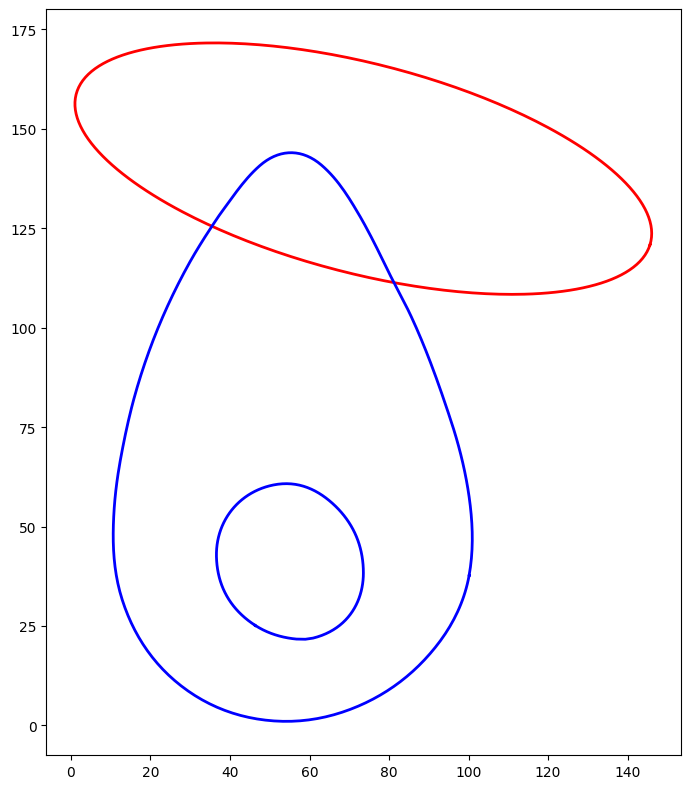

In [29]:
val = read_csv('/content/occlusion1_sol.csv')
plot(val)